In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('C:/Users/HARSHA/Downloads/Fatigue Dataset.xlsx')

In [3]:
data.head(10).append(data.tail(10))

,Unit Cell,Porosity,Load,Life Range
0,FCC,30,70,7
1,FCC,30,75,7
2,FCC,30,80,7
3,FCC,30,85,6
4,FCC,30,90,6
5,FCC,30,95,6
6,FCC,30,100,6
7,FCC,30,105,5
8,FCC,30,110,5
9,FCC,30,115,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unit Cell   561 non-null    object
 1   Porosity    561 non-null    int64 
 2   Load        561 non-null    int64 
 3   Life Range  561 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.7+ KB


In [5]:
data.describe()

,Porosity,Load,Life Range
count,561.000000,561.000000,561.000000
mean,50.484848,113.333333,4.737968
std,12.718106,44.261130,1.629242
min,30.000000,30.000000,1.000000
25%,39.000000,80.000000,4.000000
50%,51.000000,110.000000,5.000000
75%,62.000000,145.000000,6.000000
max,70.000000,200.000000,7.000000


In [6]:
missing_values_count = data.isnull().sum()
missing_values_count

Unit Cell     0
Porosity      0
Load          0
Life Range    0
dtype: int64

<AxesSubplot:xlabel='Unit Cell', ylabel='Life Range'>

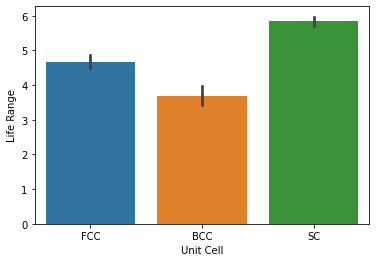

In [7]:
sns.barplot(x="Unit Cell",y="Life Range",data=data)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.iloc[:, 0] = le.fit_transform(data.iloc[:, 0])

In [9]:
x=data.iloc[:,:-1]

In [10]:
y=data.iloc[:,-1:]

In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, random_state=1)

In [12]:
print(x.shape, y.shape)

(561, 3) (561, 1)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(392, 3) (169, 3) (392, 1) (169, 1)


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

<ipython-input-14-3dd65b1cfb8a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)


KNeighborsClassifier()

In [15]:
yhat = model.predict(x_test)

In [16]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 54.438
